## Data Processing

In [0]:
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample01-02-03.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample04-05-06.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample07-08-09.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample10-11-12.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample13-14-15.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample16-17-18.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample19-20-21.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample22-23-24.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample25-26-27.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample28-29-30.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample31-32-33.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample34-35-36.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample37-38-39.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample40-41-42.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample43-44-45.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample46-47-48.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample49-50-51.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample52-53-54.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample55-56-57.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample58-59-60.tar.gz
# !wget https://www.cs.columbia.edu/CAVE/exclude/curet/dataComp/sample61.tar.gz

!for file in *.tar.gz; do tar -C data -zxf "$file"; done

!for folder in {1..9};do for file in data/data/sample0"$folder"/*.Z; do uncompress "$file"; done; done
!for folder in {10..61};do for file in data/data/sample"$folder"/*.Z; do uncompress "$file"; done; done

In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [8]:
root_folder = 'data/data/'
template_name = root_folder + 'samplexx/' + 'xx-xx-xx.bmp'
import glob
import os

filenames = []

for r, d, f in os.walk(root_folder):
    if r.__contains__("sample"):
        for file in f:
            if file.endswith(".bmp"):
                name = os.path.join(r, file)
                if len(name) == len(template_name) and not name[-10].__contains__('b'):
                    filenames.append(name)
print(len(filenames))
filenames = np.array(filenames)

12505


In [9]:
# random subsample with size of 92
sample_size = 92
n_classes = 61
samples_per_class = 205
samples = samples_per_class - sample_size

for i in range(n_classes):
    drop_idx = random.sample(range(i*samples_per_class, (i+1)*samples_per_class), samples)
    filenames[drop_idx] = ''
filenames = [name for name in filenames if name != '']
print(len(filenames))

5612


In [10]:
for i in range(9):
    print(len([s for s in filenames if s.__contains__('sample0'+str(i+1))]),', ', end='')
for i in range(10,62):
    print(len([s for s in filenames if s.__contains__('sample'+str(i))]), ', ', end='')

92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 92 , 

In [11]:
shape = (480, 640)
crop_size = 200
center = np.array(shape) // 2

x = np.empty((len(filenames), crop_size, crop_size))

for i, f in enumerate(filenames):
    # grayscale mode
    img = cv2.imread(f, 0)

    if img is None:
        continue

    # center crop to (200, 200)
    x[i] = img[center[0]-crop_size//2:center[0]+crop_size//2, center[1]-crop_size//2:center[1]+crop_size//2]
    
    if i % 1000 == 0:
        print('{} images processed...'.format(i))
    
# note that image indexed at 5436 is invalid and NoneType in non sampled filenames.

0 images processed...
1000 images processed...
2000 images processed...
3000 images processed...
4000 images processed...
5000 images processed...


(5612, 200, 200)


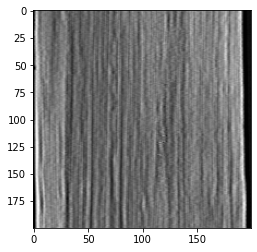

In [12]:
print(x.shape)
plt.imshow(x[1552], cmap='gray')

In [0]:
# normalization

mean = x.mean()
std = x.std()

x = (x - mean) / std

In [0]:
# generate labels
y = np.empty((len(x), ))
for i, f in enumerate(filenames):
    y[i] = int(f[16:18])

In [0]:
# test-train split
# evenly split
# ratio = 0.5

x_train = np.empty((len(x)//2, x.shape[1], x.shape[2]))
x_test = np.empty((len(x)//2, x.shape[1], x.shape[2]))
y_train = np.empty((len(x)//2, ))
y_test = np.empty((len(x)//2, ))

for i in range(n_classes):
    indices = list(range(i*sample_size, i*sample_size+sample_size//2))
    x_train[list(range(indices[0]//2, indices[0]//2+sample_size//2))] = x[indices]
    y_train[list(range(indices[0]//2, indices[0]//2+sample_size//2))] = y[indices]
    indices = list(range(i*sample_size+sample_size//2, (i+1)*sample_size))
    x_test[list(range((indices[0]-sample_size//2)//2, (indices[0]-sample_size//2)//2+sample_size//2))] = x[indices]
    y_test[list(range((indices[0]-sample_size//2)//2, (indices[0]-sample_size//2)//2+sample_size//2))] = y[indices]

y_train = y_train.astype(np.uint8)
y_test = y_test.astype(np.uint8)

## Filter Bank

ref: http://www.robots.ox.ac.uk/~vgg/research/texclass/code/makeRFSfilters.m

In [0]:
def gaussian1d(sigma, mean, x, ord):
    x = np.array(x)
    x = x - mean
    var = sigma**2
    num = x*x
    denom = 2*var

    # Gaussian Function
    g = (1/np.sqrt(np.pi*denom))*(np.exp((-1*num)/denom))
    
    if ord == 0:
        return g
    elif ord == 1:
        g = -g*((x)/(var))
        return g
    else:
        g = g*((num - var)/(var**2))
        return g

In [0]:
def gaussian2d(sup, scales):
    var = scales * scales
    denom = 2*var
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    num = x*x
    g = (1/np.sqrt(np.pi*denom))*np.exp( -(num + y*y) / denom )
    return g

In [0]:
def log2d(sup, scales):
    var = scales * scales
    denom = 2*var
    shape = (sup,sup)
    n,m = [(i - 1)/2 for i in shape]
    x,y = np.ogrid[-m:m+1,-n:n+1]
    num = x*x
    g = (1/np.sqrt(np.pi*denom))*np.exp( -(num + y*y) / denom)
    f = g*((num + y*y) - var)/(var**2)
    return f

In [0]:
def make_filter(scale, phasex, phasey, pts, sup):
    gx = gaussian1d(3*scale, 0, pts[0, :], phasex)
    gy = gaussian1d(scale, 0, pts[1, :], phasey)
    image = gx * gy
    image = np.reshape(image,(sup,sup))
    return image

In [0]:
def RFS_filters():
    sup     = 49  # largest kernel size
    scalex  = np.sqrt(2) * np.array([1,2,4])  # 3 scales
    norient = 6  # 6 orientations
    nrotinv = 2  # 2 rotation invariant

    nbar = len(scalex)*norient
    nedge = len(scalex)*norient
    nf = nbar+nedge+nrotinv
    F = np.empty([sup,sup,nf])
    hsup  = (sup - 1)/2

    x = [np.arange(-hsup,hsup+1)]
    y = [np.arange(-hsup,hsup+1)]

    [x,y] = np.meshgrid(x,y)

    orgpts = [x.flatten(), y.flatten()]
    orgpts = np.array(orgpts)
    
    count = 0
    for scale in range(len(scalex)):
        for orient in range(norient):
            angle = (np.pi * orient)/norient
            c = np.cos(angle)
            s = np.sin(angle)
            rotpts = np.dot(np.array([[c, -s],[s, c]]), orgpts)
            F[:, :, count] = make_filter(scalex[scale], 0, 1, rotpts, sup)
            F[:, :, count+nedge] = make_filter(scalex[scale], 0, 2, rotpts, sup)
            count = count + 1
            
    count = nbar + nedge
    
    F[:,:,count] = gaussian2d(sup, scalex[-1])
    F[:,:,count+1] = log2d(sup, 3*scalex[-1])
    return F

In [21]:
F = RFS_filters()
print (F.shape)

(49, 49, 38)


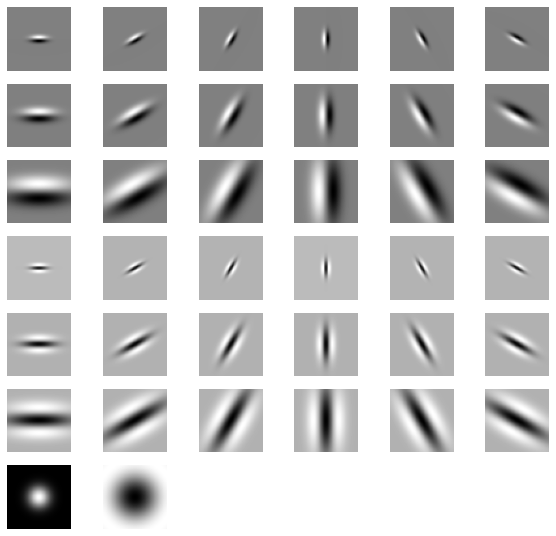

In [22]:
plt.figure(figsize=(10, 11))

for i in range(0,38):
    plt.subplot(8,6,i+1)
    plt.axis('off')
    plt.imshow(F[:,:,i], cmap = 'gray')

## Training

In [91]:
train_samples = 13

all_classes_responses = []

for cls in range(n_classes):
    indices = (y_train==cls+1).nonzero()[0]
    random_samples = x_train[random.sample(list(indices), train_samples)]

    class_MR8 = np.zeros((train_samples, 8, crop_size, crop_size))

    for idx, s in enumerate(random_samples):
        responses = np.empty((F.shape[-1], crop_size, crop_size))
        max_responses = np.zeros((8, crop_size, crop_size))
        for i in range(38):
            responses[i] = cv2.filter2D(s, -1, F[:,:, i])
        for i in range(6):
            max_responses[i] = np.max(responses[i*6:(i+1)*6], axis=0)
        max_responses[6] = responses[36]
        max_responses[7] = responses[37]
        class_MR8[idx] = max_responses
    all_classes_responses.append(class_MR8)
    print('class #{} has been processed... '.format(cls+1))
np.array(all_classes_responses).shape

(61, 13, 8, 200, 200)

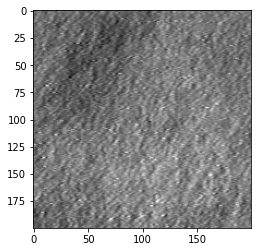

In [85]:
plt.imshow(random_samples[0], cmap='gray')

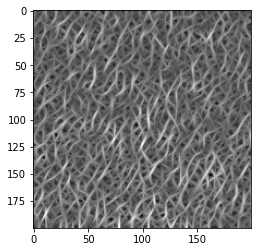

In [89]:
plt.imshow(class_MR8[0,3], cmap='gray')